Working with Real Data
IMPROVE
1. Go to http://views.cira.colostate.edu/fed/QueryWizard/Default.aspx
2. Download data for the GUMO1 site. Site location file can be found here:
Guadalupe Mountains National Park, TX, Lat. 31.833, Long. -104.8094
3. Make a Pie Chart for chemical composition of PM2.5 chemical composition for
1995, 2005 and 2015 for this site. Which five species are most abundant in PM2.5 at
GUMO1?
4. Look at the full time period of the data record, and analyze the long-term trend
of PM2.5, and its five most major components at GUMO1.

In [163]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [164]:
# Load data
filename = 'PM2.5 1995_2005_2015.xlsx'
data = pd.read_excel(filename, sheet_name='Data') #, header=0, index_col=0)
# data.index.name=None
data

,Dataset,SiteCode,POC,Date,Alf,ammNO3f,ammSO4f,Asf,BRf,Caf,...,Sif,Naf,SOILf,SRf,SO4f,Sf,Tif,Vf,ZNf,ZRf
0,IMPAER,GUMO1,1,01/04/1995,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,...,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000
1,IMPAER,GUMO1,1,01/07/1995,0.02198,0.47382,0.64597,0.00255,0.00135,0.01567,...,0.03013,0.07344,0.17536,0.00008,0.46980,0.18299,0.00174,0.00081,0.00606,0.00000
2,IMPAER,GUMO1,1,01/11/1995,0.08953,0.10010,0.64226,0.00486,0.00129,0.07265,...,0.08755,0.02717,0.58561,0.00023,0.46710,0.19924,0.00000,0.00225,0.00907,0.00000
3,IMPAER,GUMO1,1,01/14/1995,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,...,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000
4,IMPAER,GUMO1,1,01/18/1995,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,...,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,IMPAER,GUMO1,1,12/17/2015,0.08679,0.16564,0.29741,0.00027,0.00121,0.06685,...,0.11539,0.01235,0.66003,0.00063,0.21630,0.08132,0.00254,0.00013,0.00195,0.00140
343,IMPAER,GUMO1,1,12/20/2015,0.09953,0.23179,0.91862,0.00025,0.00199,0.12308,...,0.25658,0.04913,1.21195,0.00060,0.66809,0.23439,0.00518,0.00064,0.00457,-0.00112
344,IMPAER,GUMO1,1,12/23/2015,0.08543,0.11177,0.51238,0.00085,0.00132,0.05092,...,0.11188,0.03119,0.61177,0.00021,0.37264,0.12877,0.00212,0.00001,0.00210,0.00102
345,IMPAER,GUMO1,1,12/26/2015,0.20917,-999.00000,0.42801,0.00000,0.00057,0.12215,...,0.48186,0.02675,2.10299,0.00042,-999.00000,0.10376,0.01267,0.00022,0.00078,-0.00055


In [165]:
# Converting the date to datetime
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data

,Dataset,SiteCode,POC,Date,Alf,ammNO3f,ammSO4f,Asf,BRf,Caf,...,Sif,Naf,SOILf,SRf,SO4f,Sf,Tif,Vf,ZNf,ZRf
0,IMPAER,GUMO1,1,1995-01-04,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,...,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000
1,IMPAER,GUMO1,1,1995-01-07,0.02198,0.47382,0.64597,0.00255,0.00135,0.01567,...,0.03013,0.07344,0.17536,0.00008,0.46980,0.18299,0.00174,0.00081,0.00606,0.00000
2,IMPAER,GUMO1,1,1995-01-11,0.08953,0.10010,0.64226,0.00486,0.00129,0.07265,...,0.08755,0.02717,0.58561,0.00023,0.46710,0.19924,0.00000,0.00225,0.00907,0.00000
3,IMPAER,GUMO1,1,1995-01-14,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,...,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000
4,IMPAER,GUMO1,1,1995-01-18,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,...,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,IMPAER,GUMO1,1,2015-12-17,0.08679,0.16564,0.29741,0.00027,0.00121,0.06685,...,0.11539,0.01235,0.66003,0.00063,0.21630,0.08132,0.00254,0.00013,0.00195,0.00140
343,IMPAER,GUMO1,1,2015-12-20,0.09953,0.23179,0.91862,0.00025,0.00199,0.12308,...,0.25658,0.04913,1.21195,0.00060,0.66809,0.23439,0.00518,0.00064,0.00457,-0.00112
344,IMPAER,GUMO1,1,2015-12-23,0.08543,0.11177,0.51238,0.00085,0.00132,0.05092,...,0.11188,0.03119,0.61177,0.00021,0.37264,0.12877,0.00212,0.00001,0.00210,0.00102
345,IMPAER,GUMO1,1,2015-12-26,0.20917,-999.00000,0.42801,0.00000,0.00057,0.12215,...,0.48186,0.02675,2.10299,0.00042,-999.00000,0.10376,0.01267,0.00022,0.00078,-0.00055


In [166]:
# Extract the year from the 'Date' column
data['Year'] = data['Date'].dt.year
data

,Dataset,SiteCode,POC,Date,Alf,ammNO3f,ammSO4f,Asf,BRf,Caf,...,Naf,SOILf,SRf,SO4f,Sf,Tif,Vf,ZNf,ZRf,Year
0,IMPAER,GUMO1,1,1995-01-04,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,...,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,1995
1,IMPAER,GUMO1,1,1995-01-07,0.02198,0.47382,0.64597,0.00255,0.00135,0.01567,...,0.07344,0.17536,0.00008,0.46980,0.18299,0.00174,0.00081,0.00606,0.00000,1995
2,IMPAER,GUMO1,1,1995-01-11,0.08953,0.10010,0.64226,0.00486,0.00129,0.07265,...,0.02717,0.58561,0.00023,0.46710,0.19924,0.00000,0.00225,0.00907,0.00000,1995
3,IMPAER,GUMO1,1,1995-01-14,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,...,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,1995
4,IMPAER,GUMO1,1,1995-01-18,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,...,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,IMPAER,GUMO1,1,2015-12-17,0.08679,0.16564,0.29741,0.00027,0.00121,0.06685,...,0.01235,0.66003,0.00063,0.21630,0.08132,0.00254,0.00013,0.00195,0.00140,2015
343,IMPAER,GUMO1,1,2015-12-20,0.09953,0.23179,0.91862,0.00025,0.00199,0.12308,...,0.04913,1.21195,0.00060,0.66809,0.23439,0.00518,0.00064,0.00457,-0.00112,2015
344,IMPAER,GUMO1,1,2015-12-23,0.08543,0.11177,0.51238,0.00085,0.00132,0.05092,...,0.03119,0.61177,0.00021,0.37264,0.12877,0.00212,0.00001,0.00210,0.00102,2015
345,IMPAER,GUMO1,1,2015-12-26,0.20917,-999.00000,0.42801,0.00000,0.00057,0.12215,...,0.02675,2.10299,0.00042,-999.00000,0.10376,0.01267,0.00022,0.00078,-0.00055,2015


In [167]:
data = data.drop(['Dataset', 'Date', 'SiteCode','POC'], axis=1)
data

,Alf,ammNO3f,ammSO4f,Asf,BRf,Caf,Ecf,Ocf,CHLf,CRf,...,Naf,SOILf,SRf,SO4f,Sf,Tif,Vf,ZNf,ZRf,Year
0,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,...,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,1995
1,0.02198,0.47382,0.64597,0.00255,0.00135,0.01567,-999.00000,-999.00000,0.01780,0.00000,...,0.07344,0.17536,0.00008,0.46980,0.18299,0.00174,0.00081,0.00606,0.00000,1995
2,0.08953,0.10010,0.64226,0.00486,0.00129,0.07265,0.24120,0.49100,0.00790,0.00101,...,0.02717,0.58561,0.00023,0.46710,0.19924,0.00000,0.00225,0.00907,0.00000,1995
3,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,...,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,1995
4,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,...,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,0.08679,0.16564,0.29741,0.00027,0.00121,0.06685,0.14002,0.43535,0.01785,0.00010,...,0.01235,0.66003,0.00063,0.21630,0.08132,0.00254,0.00013,0.00195,0.00140,2015
343,0.09953,0.23179,0.91862,0.00025,0.00199,0.12308,0.13227,0.54482,0.00854,0.00024,...,0.04913,1.21195,0.00060,0.66809,0.23439,0.00518,0.00064,0.00457,-0.00112,2015
344,0.08543,0.11177,0.51238,0.00085,0.00132,0.05092,0.04900,0.22520,0.00460,0.00007,...,0.03119,0.61177,0.00021,0.37264,0.12877,0.00212,0.00001,0.00210,0.00102,2015
345,0.20917,-999.00000,0.42801,0.00000,0.00057,0.12215,-999.00000,-999.00000,-999.00000,0.00018,...,0.02675,2.10299,0.00042,-999.00000,0.10376,0.01267,0.00022,0.00078,-0.00055,2015


In [168]:
# replace -999 with 0
data.replace(-999.00000, 0, inplace=True)
data

,Alf,ammNO3f,ammSO4f,Asf,BRf,Caf,Ecf,Ocf,CHLf,CRf,...,Naf,SOILf,SRf,SO4f,Sf,Tif,Vf,ZNf,ZRf,Year
0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1995
1,0.02198,0.47382,0.64597,0.00255,0.00135,0.01567,0.00000,0.00000,0.01780,0.00000,...,0.07344,0.17536,0.00008,0.46980,0.18299,0.00174,0.00081,0.00606,0.00000,1995
2,0.08953,0.10010,0.64226,0.00486,0.00129,0.07265,0.24120,0.49100,0.00790,0.00101,...,0.02717,0.58561,0.00023,0.46710,0.19924,0.00000,0.00225,0.00907,0.00000,1995
3,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1995
4,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,0.08679,0.16564,0.29741,0.00027,0.00121,0.06685,0.14002,0.43535,0.01785,0.00010,...,0.01235,0.66003,0.00063,0.21630,0.08132,0.00254,0.00013,0.00195,0.00140,2015
343,0.09953,0.23179,0.91862,0.00025,0.00199,0.12308,0.13227,0.54482,0.00854,0.00024,...,0.04913,1.21195,0.00060,0.66809,0.23439,0.00518,0.00064,0.00457,-0.00112,2015
344,0.08543,0.11177,0.51238,0.00085,0.00132,0.05092,0.04900,0.22520,0.00460,0.00007,...,0.03119,0.61177,0.00021,0.37264,0.12877,0.00212,0.00001,0.00210,0.00102,2015
345,0.20917,0.00000,0.42801,0.00000,0.00057,0.12215,0.00000,0.00000,0.00000,0.00018,...,0.02675,2.10299,0.00042,0.00000,0.10376,0.01267,0.00022,0.00078,-0.00055,2015


In [169]:
# set year as index
# data.set_index('Year', inplace=True)
# data

In [170]:
# select only numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

In [171]:
len(numerical_cols)

33

In [172]:
# find average for each year
yearly_avg = data.groupby('Year')[numerical_cols].mean()
yearly_avg


,Alf,ammNO3f,ammSO4f,Asf,BRf,Caf,Ecf,Ocf,CHLf,CRf,...,Sif,Naf,SOILf,SRf,SO4f,Sf,Tif,Vf,ZNf,ZRf
Year,,,,,,,,,,,,,,,,,,,,,
1995,0.126847,0.237642,1.587863,0.001028,0.001702,0.104956,0.103229,0.468982,0.015944,0.000451,...,0.282423,0.055902,1.321195,0.000837,1.154810,0.428538,0.007458,0.001320,0.003101,0.000059
2005,0.088727,0.325542,1.751989,0.000218,0.001539,0.083755,0.135948,0.711558,0.017111,0.000070,...,0.221463,0.033861,1.014339,0.000953,1.274174,0.472762,0.004802,0.000706,0.002464,0.000026
2015,0.129645,0.220332,1.231090,0.000065,0.001467,0.099964,0.082690,0.497841,0.009175,0.000189,...,0.234309,0.034700,1.181884,0.000771,0.890715,0.335735,0.005835,0.000300,0.001314,0.000332


In [173]:
# Save the DataFrame to an Excel file
# yearly_avg.to_excel("pm2.5 average.xlsx") 


In [174]:
# yearly_avg.isna().sum()
# yearly_avg = yearly_avg.fillna(0)

In [175]:
# Checking for negative values and NaN
yearly_avg = yearly_avg.clip(lower=0)  
yearly_avg = yearly_avg.fillna(0)

In [176]:
# # Loop through each year and its row
# for year, row in yearly_avg.iterrows():
#     # Sort the compounds in descending order
#     sorted_compounds = row.sort_values(ascending=False)
    
#     # Group all compounds with values less than 1 into 'Others'
#     others = sorted_compounds[sorted_compounds < 1].sum()
    
#     # Filter out the compounds with values >= 1
#     sorted_compounds = sorted_compounds[sorted_compounds >= 1]
    
#     # Add the 'Others' category if it exists
#     if others > 0:
#         sorted_compounds['Others'] = others
    
#     # Plot the pie chart
#     plt.figure(figsize=(8, 6))  # Create a new figure for each year
#     wedges, texts, autotexts = plt.pie(
#         sorted_compounds, autopct='%1.1f%%', labels=sorted_compounds.index, startangle=90
#     )
    
#     # Set the title to indicate the year
#     plt.title(f'PM2.5 Chemical Composition in {year}')
    
#     # Equal aspect ratio ensures that pie is drawn as a circle.
#     plt.axis('equal')  
    
#     # Display the pie chart
#     plt.show()

A Pie Chart with compounds less than 1% lumped and named 'others'
---

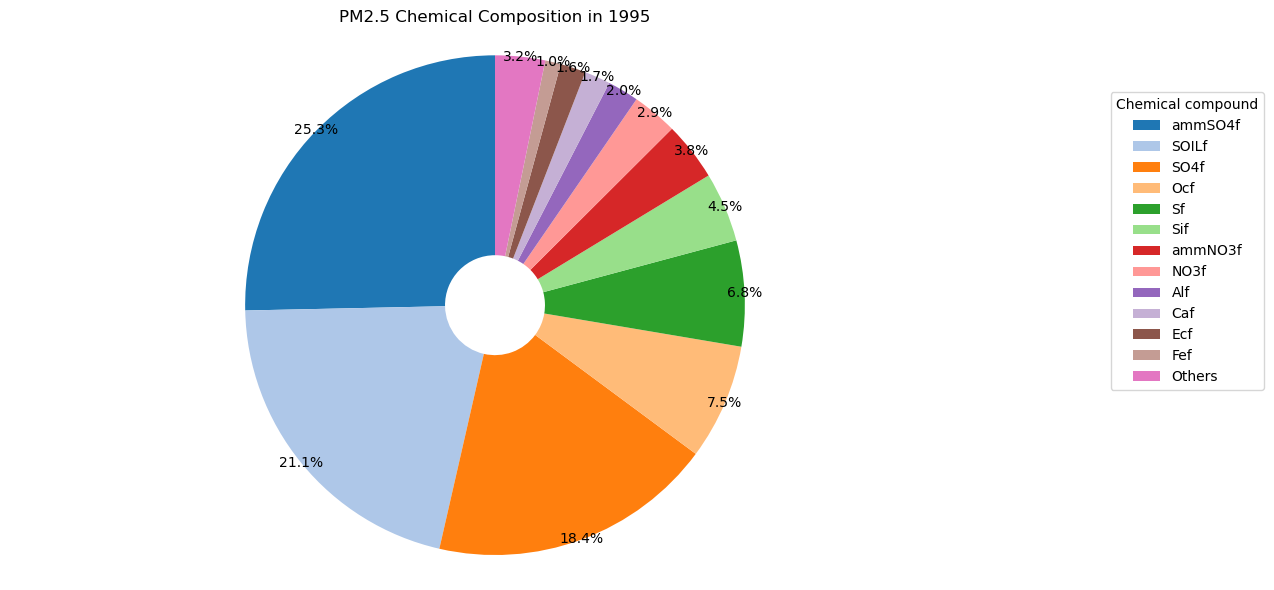

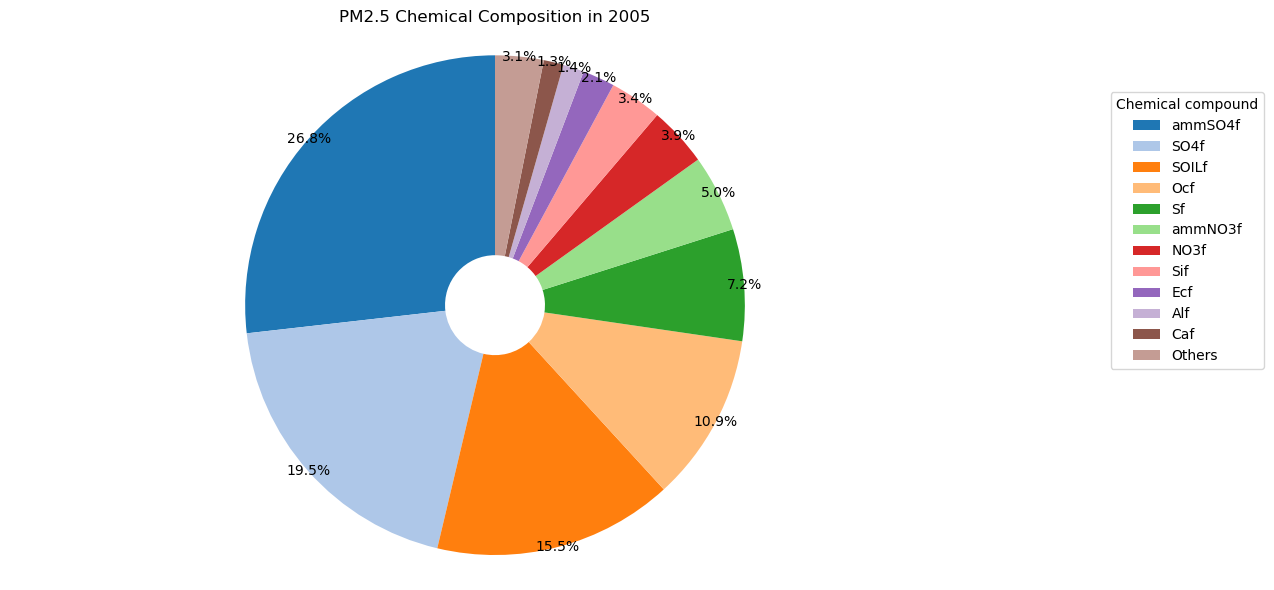

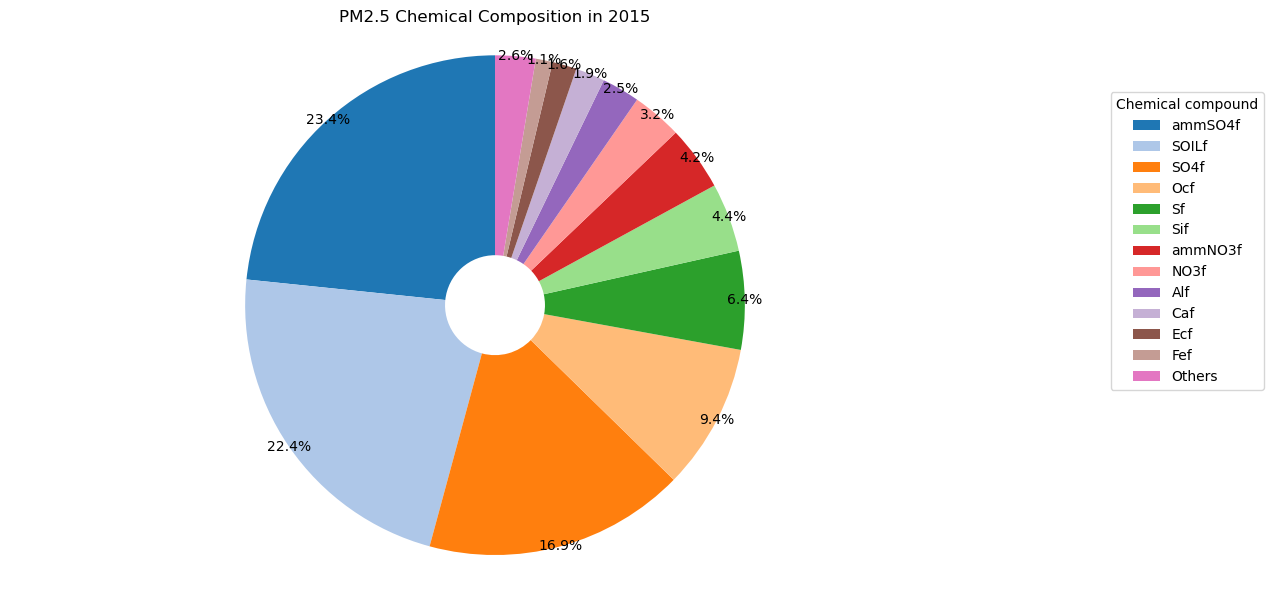

In [177]:
# Loop through each year and its row
for year, row in yearly_avg.iterrows():
    total = row.sum()  # Get the total amount for the year
    
    # Calculate percentage for each compound
    percentages = (row / total) * 100
    
    # Sort the compounds in descending order
    sorted_compounds = percentages.sort_values(ascending=False)
    
    # Group all compounds with percentages less than 1% into 'Others'
    others = sorted_compounds[sorted_compounds < 1].sum()
    
    # Filter out the compounds with percentages >= 1%
    sorted_compounds = sorted_compounds[sorted_compounds >= 1]
    
    # Add the 'Others' category if it exists
    if others > 0:
        sorted_compounds['Others'] = others
    
    # Plot the pie chart
    plt.figure(figsize=(10, 6))  # Create a new figure for each year
    wedges, texts, autotexts = plt.pie(
        sorted_compounds, autopct='%1.1f%%',  startangle=90,
    wedgeprops=dict(width=0.8), pctdistance=1.0, colors=plt.cm.tab20.colors)
    
    # Set the title to indicate the year
    plt.title(f'PM2.5 Chemical Composition in {year}')
    plt.legend(wedges, sorted_compounds.index, title="Chemical compound", loc=0, bbox_to_anchor=(1.0, 0.4, 0.3, 0.5), ncols=1)
    plt.tight_layout()  # Adjust layout to fit everything
    
    # Save each plot with a unique name
    plt.savefig(f'PM2.5 Compositions{year}.png', format='png', dpi=300)
    
    # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.axis('equal')
    
    # Display the pie chart
    plt.show()

PM2.5 Composition with all less than 1 summed to form 'others'
---

In [178]:
# for year, row in yearly_avg.iterrows():
#     # Sort the compound values in descending order
#     sorted_compounds = row.sort_values(ascending=False)

#     # Separate compounds >= 1 and compounds < 1
#     # compounds_gte_1 = sorted_compounds[sorted_compounds >= 1]
#     # yearly_avg_ls_1 = yealy_avg[yearly_avg < 1]
#     others = sorted_compounds[sorted_compounds < 1].sum()
#     # yearly_ls_1 = yearly_avg[yearly_avg < 1].sum()

#     # Add "Others" if the sum of compounds < 1 is non-zero
#     # if others > 0:
#         # compounds_gte_1['Others'] = others

    
#     # Check if the filtered compounds are not empty
#     # if compounds_gte_1.empty:
#         # continue

#     # Plot the pie chart for each year
#     plt.figure(figsize=(8, 6))  # Create a new figure for each year
    
#     # Generate the pie chart
#     wedges, texts, autotexts = plt.pie(
#         sorted_compounds, autopct='%1.1f%%', labels=None, startangle=90
#     )
    
#     # Add title and legend
#     # plt.title(f'PM2.5 Chemical Composition in {year}')
#     # plt.legend(
#     #     wedges, compounds_gte_1.index, title="Chemical Compounds",
#     #     loc="center left", bbox_to_anchor=(0.8, 0.14, 0.5, 1.4), ncol=1
#     # )
    
#     # plt.axis('equal')  # Ensure the pie chart is drawn as a circle
#     # plt.tight_layout()  # Adjust layout to fit everything
    
#     # Save each plot with a unique name
#     # plt.savefig(f'PM2.5 Compositions{year}.png', format='png', dpi=300)

#     plt.show()


In [179]:
# # Loop through each year and plot the top 5 compounds + "Others"
# for year, row in yearly_avg.iterrows():
#     # Sort only the compound values in descending order
#     sorted_compounds = row.sort_values(ascending=False)

#     # Select the top 5 compounds
#     top_5 = sorted_compounds[:5]
    
#     # Sum the remaining compounds and label as "Others"
#     others = sorted_compounds[5:].sum()
    
#     # Add "Others" if non-zero
#     if others > 0:
#         top_5['Others'] = others
    
#     # Check if top_5 is not empty
#     if top_5.empty:
#         continue

#     for i in range(3):
#     # Plot the pie chart
#         plt.figure(figsize=(4, 4))
#         wedges, texts, autotexts = plt.pie(top_5, autopct='%1.1f%%', labels=top_5.index, startangle=90)
        
#         # Add title and legend
#         plt.title(f'Major Chemical Composition of PM2.5 in {year}')
#         # plt.legend(wedges, top_5.index, title="Chemical compound", loc="center left", bbox_to_anchor=(0.8, 0.13, 0.5, 1.4), ncols=1)
        
#         plt.axis('equal')  # Ensures pie chart is drawn as a circle
#         plt.tight_layout()  # Adjust layout
#         # plt.show()
#         # plt.savefig(f'PM2.5_Major_5_and_Others_{year}.png', format='png', dpi=300)

In [180]:
# data.columns = data.iloc[0]
# data = data.drop(data.index[0])
# data